In [1]:
import ROOT

Welcome to JupyROOT 6.28/00


In [5]:
import uproot
import numpy as np
import pandas as pd
import awkward as ak
import os

In [6]:
dir_path = "/global/cfs/cdirs/atlas/gottino/Charm/Analysis/run_batch_gup/ntuples"

files = os.listdir(dir_path)
files

['CharmAnalysis.mc.ForcedDecay.Dplus.tree.root',
 'CharmAnalysis.mc.ForcedDecay.LabmdaC.tree.root']

In [9]:
#processes ntunples given directory: returns trees 
def process_ntuple(ntuple):
    file = uproot.open(dir_path + "/" + ntuple)
    tree = file["CharmAnalysis;1"]
    return tree

#takes event #, list of branches, and batch size: returns tuple of branches with data
def show(event, TTree, branches, batch_size):
    #if we want the entire data set set batch size = 0
    if batch_size == 0:
        batch_size = TTree.num_entries

    #iterates through TTree as generator functiona and yields batches of data
    current_event = 0
    for array in TTree.iterate(branches, step_size = batch_size, library = "pd"):
        arrays = array[branches]
        if current_event == event:
            break
        current_event+=1
    return arrays

In [10]:
TTree = process_ntuple(files[0])
TTree.name

'CharmAnalysis'

In [23]:
df = show(0, TTree, ["DMesons_pt", "DMesons_m", "DMesons_eta", "DMesons_phi"], 1000)

#drop empty rows
empty_indices = [i for i, x in enumerate(df['DMesons_pt']) if len(x) == 0]
df = df.drop(empty_indices)
df = df.reset_index(drop=True)
df

,DMesons_pt,DMesons_m,DMesons_eta,DMesons_phi
0,"[5735.74853515625, 5735.74853515625]","[1860.0809326171875, 2207.808349609375]","[0.9682132005691528, 0.9682132005691528]","[1.2285282611846924, 1.2285282611846924]"
1,[10047.125],[1862.4176025390625],[0.08182407170534134],[2.709681510925293]
2,"[18993.7421875, 18993.7421875]","[1853.90625, 2398.886962890625]","[-1.6619627475738525, -1.6619627475738525]","[-0.46051180362701416, -0.46051180362701416]"
3,"[10118.494140625, 10118.494140625]","[1874.203125, 2468.1806640625]","[0.041659336537122726, 0.041659336537122726]","[0.780849277973175, 0.780849277973175]"
4,"[12579.470703125, 12579.470703125]","[1884.987060546875, 2220.384521484375]","[-1.1025604009628296, -1.1025604009628296]","[0.7788794040679932, 0.7788794040679932]"
...,...,...,...,...
556,"[5451.50732421875, 5451.50732421875]","[1849.396240234375, 2459.749755859375]","[-0.064152292907238, -0.064152292907238]","[2.395824909210205, 2.395824909210205]"
557,"[30662.75, 30662.75, 30662.75]","[1872.678955078125, 2392.157470703125, 2270.92...","[1.7234350442886353, 1.7234350442886353, 1.723...","[-0.5089108347892761, -0.5089108347892761, -0...."
558,"[11592.576171875, 11592.576171875]","[1850.5804443359375, 2294.733642578125]","[-0.22858543694019318, -0.22858543694019318]","[0.2433209866285324, 0.2433209866285324]"
559,[9751.6259765625],[2263.62890625],[-0.15377356112003326],[-1.8734217882156372]


In [24]:
TTree2 = process_ntuple(files[0])


df2 = show(0, TTree2, ['DMesons_fitOutput__Charge', 'DMesons_fitOutput__Lxy','DMesons_daughterInfo__pdgId'], 100)
empty_indices2 = [i for i, x in enumerate(df2['DMesons_fitOutput__Charge']) if len(x) == 0]
df2 = df2.drop(empty_indices2)
df2 = df2.reset_index(drop=True)
df2

,DMesons_fitOutput__Charge,DMesons_fitOutput__Lxy,DMesons_daughterInfo__pdgId
0,"[1, 1]","[3.940532684326172, 3.940532684326172]","((-321, 211, 211), (2212, -321, 211))"
1,[1],[2.3395302295684814],"((-321, 211, 211))"
2,"[1, 1]","[1.9184143543243408, 1.9184143543243408]","((-321, 211, 211), (2212, -321, 211))"
3,"[1, 1]","[2.8901257514953613, 2.8901257514953613]","((-321, 211, 211), (2212, -321, 211))"
4,"[1, 1]","[0.9249186515808105, 0.9249186515808105]","((-321, 211, 211), (2212, -321, 211))"
...,...,...,...
60,"[1, 1]","[0.9720778465270996, 0.9720778465270996]","((-321, 211, 211), (2212, -321, 211))"
61,[1],[0.21821393072605133],"((2212, -321, 211))"
62,"[1, 1]","[14.670319557189941, 14.670319557189941]","((-321, 211, 211), (2212, -321, 211))"
63,[1],[0.3555510938167572],"((2212, -321, 211))"


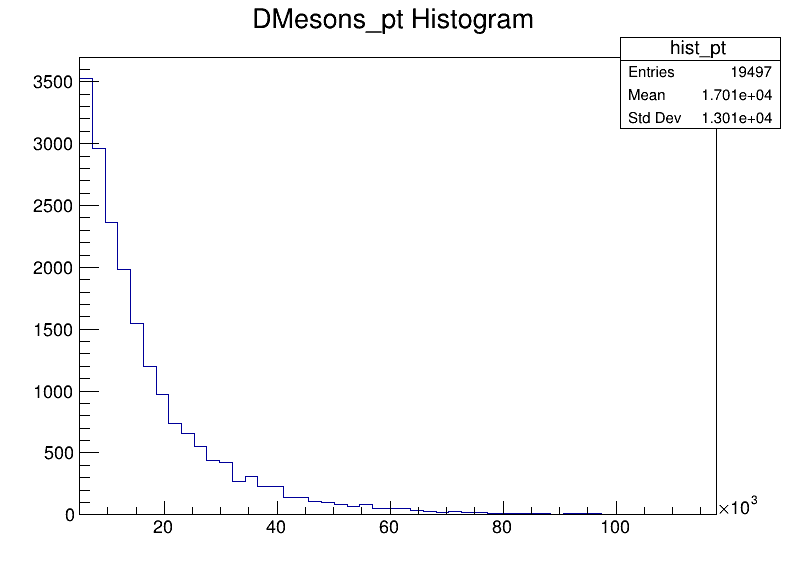

In [14]:
DMesons_pt = []
for pt in df['DMesons_pt']:
    DMesons_pt.extend(pt)

nbins = 50
xmin = np.min(df["DMesons_pt"])[0]
xmax = np.max(df["DMesons_pt"])[0]

hist = ROOT.TH1F("hist_pt", "DMesons_pt Histogram", nbins, xmin, xmax)

for i in range(len(df["DMesons_pt"])):
    pt = df["DMesons_pt"][i]
    for val in pt:
        hist.Fill(val)

# Draw the histogram
c = ROOT.TCanvas("c", "c", 800, 600)
hist.Draw()
c.Draw()

In [20]:
DMesonList = []

for index, row in df.iterrows():
    pt = row['DMesons_pt']
    eta = row['DMesons_eta']
    phi = row['DMesons_phi']
    m = row['DMesons_m']
    
    #TLorentzVector object for the current row
    p = ROOT.TLorentzVector()
    p.SetPtEtaPhiM(df['DMesons_pt'][0][0], df['DMesons_eta'][0][0], df['DMesons_phi'][0][0], df['DMesons_m'][0][0])
    
    # for i in range(1, len(pt)):
    #     p += ROOT.TLorentzVector().SetPtEtaPhiM(pt[i], eta[i], phi[i], m[i])
    
    DMesonList.append(p)

In [21]:
inv_mass_squared = lambda p1, p2: (p1 + p2).M2()

TLorentzVectorsInvMass = []
for i in range(len(DMesonList[:10000])):
    p1 = DMesonList[i]
    m2 = inv_mass_squared(p1, p1)
    TLorentzVectorsInvMass.append(m2)

In [22]:
np.sqrt(np.array(TLorentzVectorsInvMass[:10]))

array([3720.16186523, 3720.16186523, 3720.16186523, 3720.16186523,
       3720.16186523, 3720.16186523, 3720.16186523, 3720.16186523,
       3720.16186523, 3720.16186523])